<a href="https://colab.research.google.com/github/akshatsinha0407/PythonColab/blob/main/KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import pandas as pd

In [4]:
import numpy as np
%matplotlib inline

In [5]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)
X.shape

(1000, 2)

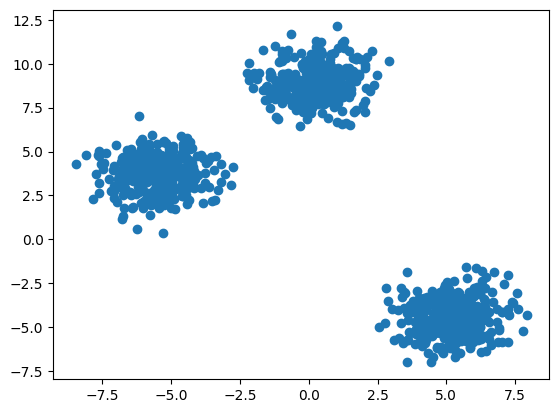

In [9]:
plt.scatter(X[:,0],X[:,1])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X ,y , test_size=.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [12]:
#from manual

In [13]:
wcss =[]

In [16]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , init ='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [17]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1032.5863649295327,
 919.460064741258,
 765.5996305837432,
 667.9974167706004,
 620.0647269888188,
 594.9662439801456]

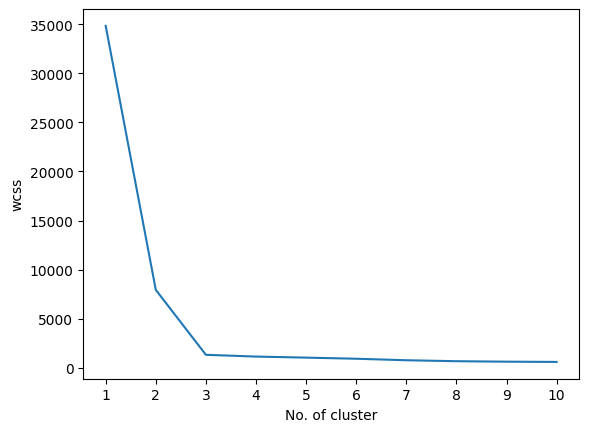

In [19]:
#from manual graph plotation
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.ylabel("wcss")
plt.xlabel("No. of cluster")
plt.show()

In [20]:
kmeans.fit_predict(X_train)

array([0, 5, 8, 4, 7, 7, 8, 4, 5, 8, 9, 6, 0, 5, 6, 0, 2, 7, 9, 2, 7, 6,
       6, 3, 7, 0, 8, 4, 7, 8, 3, 3, 5, 1, 2, 2, 2, 4, 4, 0, 8, 4, 5, 8,
       3, 9, 9, 0, 3, 8, 0, 2, 0, 5, 8, 8, 0, 2, 1, 3, 0, 5, 4, 8, 2, 2,
       9, 9, 3, 5, 6, 4, 8, 6, 8, 9, 1, 4, 7, 7, 0, 8, 2, 8, 2, 6, 5, 6,
       0, 6, 5, 6, 8, 4, 5, 8, 4, 2, 9, 6, 2, 4, 2, 5, 1, 4, 2, 8, 2, 5,
       4, 2, 8, 1, 3, 4, 3, 2, 5, 6, 5, 5, 6, 7, 8, 3, 5, 6, 4, 7, 8, 1,
       7, 4, 3, 7, 4, 1, 5, 0, 6, 6, 5, 7, 6, 2, 3, 0, 6, 6, 6, 4, 6, 8,
       8, 7, 5, 2, 2, 8, 6, 3, 6, 9, 4, 4, 4, 0, 7, 3, 0, 2, 3, 7, 9, 4,
       2, 0, 2, 1, 9, 7, 0, 3, 7, 1, 9, 0, 2, 3, 8, 9, 7, 5, 0, 6, 2, 8,
       2, 6, 2, 6, 8, 4, 0, 5, 2, 4, 2, 6, 8, 1, 0, 4, 0, 7, 2, 5, 7, 9,
       4, 5, 0, 7, 1, 2, 4, 0, 2, 9, 5, 9, 1, 5, 2, 7, 0, 8, 5, 0, 9, 8,
       8, 1, 5, 6, 9, 4, 8, 1, 5, 0, 1, 4, 7, 8, 6, 6, 1, 1, 3, 9, 9, 0,
       5, 8, 2, 9, 5, 6, 1, 2, 9, 2, 9, 3, 0, 7, 9, 3, 5, 1, 7, 2, 1, 2,
       2, 3, 1, 0, 8, 5, 1, 2, 4, 6, 0, 0, 0, 8, 4,

In [21]:
y_labels = kmeans.fit_predict(X_train)

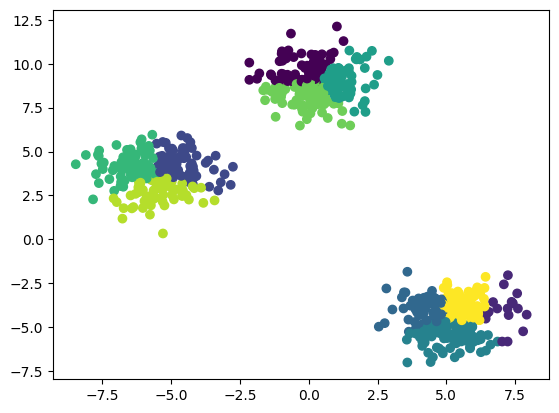

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [28]:
y_test_label=kmeans.fit_predict(X_test)

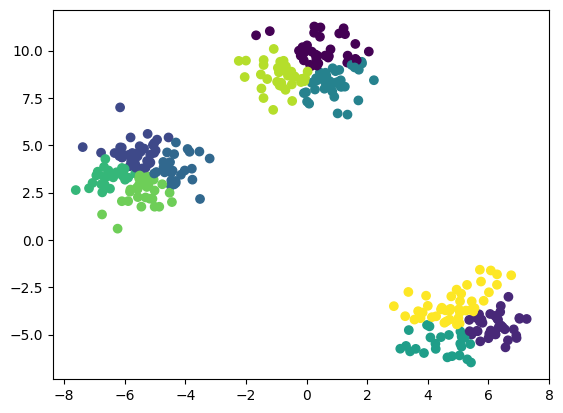

In [29]:

plt.scatter(X_test[:,0],X_test[:,1] ,c=y_test_label)

In [30]:
# from elobu methord

In [31]:
!pip install kneed

In [32]:
from kneed import KneeLocator

In [34]:
kl=KneeLocator(range(1,11),wcss, curve='convex',direction='decreasing')

In [35]:
kl.elbow


np.int64(3)

In [36]:
# to calculate performance ve have silhoutte score

In [39]:
from sklearn.metrics import silhouette_score


In [41]:

silhouette_coffi = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coffi.append(score)


In [42]:
silhouette_coffi

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.4723297879921876),
 np.float64(0.33367872107343594),
 np.float64(0.32758752735600283),
 np.float64(0.33049705268923796),
 np.float64(0.3233874690312625),
 np.float64(0.32630032779404855)]

In [43]:
# siliote score -1 to +1 jo jada vo accha

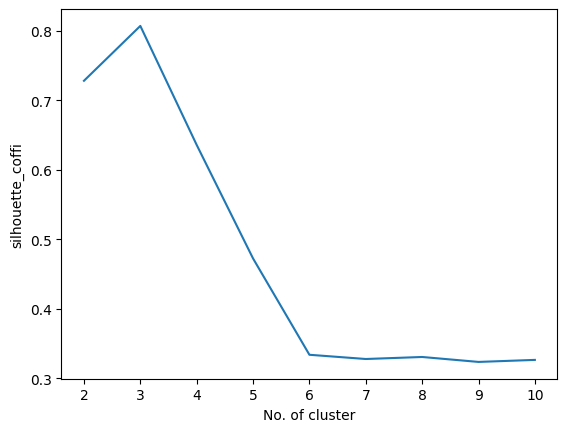

In [44]:
plt.plot(range(2, 11), silhouette_coffi)
plt.xticks(range(2, 11))
plt.ylabel("silhouette_coffi")
plt.xlabel("No. of cluster")
plt.show()